<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT22/blob/filippaolofsson-lab7/Lab7/filippaolofsson_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 7: Optimization and learning**
**Filippa Olofsson**

# **Abstract**

In this lab the assignment is to implement an iterative search method that finds a stationary point x* of an objective function f(x), the gradient descent method. The gradient descent method finds an approximation of a local minimum in $R^n$. The method is implemented by searching for the next iterate in the direction opposite the gradient of the objective function.

The method was tested by verifying the accruacy and plot the convergence rate as a contour plot with the number of gradient descent steps. The results show that the algorithm succeeds to approximate the solution with e precision of 4 decimals. 


#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [1]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [2]:
# Load neccessary modules.
from google.colab import files
from scipy import optimize
import time
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

The gradient descent method finds an approximation of a local minimum in $R^n$. The method is implemented by searching for the next iterate in the direction opposite the gradient of the objective function.



# **Method**

###1. Function: Gradient descent method in $R^n$ ###
The **gradient_descent_method** is is based on algorithm 15.1 in the coursebook, Chapter 15. 

The method computes the gradient of the objective function at the initial guess and then for each step in the while loop approximates a new vector **x** which minimizes the value of the objective function. 

Each vector **x** is calculated as:
\begin{equation} x^{(k+1)} = x^{(k)} + \alpha^{(k)}\triangledown f(x^{(k)}) \ \ (15.4)\end{equation}

$\alpha$ is calculated by the function **line_search** which here is implemented like the backtracking algorithm wich take use of the he Armijo condition, given by: 

\begin{equation} f(x^{(k)} + \alpha p_k) > f(x^{(k)}) + c \alpha \triangledown f(x^{(k)})^Tp_k \end{equation}

The initial values of the variables are:
\begin{equation} p_k = -\triangledown f(x^{(k)}), \\
c = 0.9, \\ ρ = 0.95 \ and \\ \alpha = 1 \end{equation}

The **line_search** method was inspired by: [Line Search Methods: Backtracking, Exact Step Length, and Wolfe Conditions)](https://thatdatatho.com/introduction-gradient-descent-line-search/)

I also added a condition to the while loop to stop the function from uneccesary calculations and reduces the time complexity of the algorithm. 
\begin{equation} \alpha - \rho \alpha > 0.001 \end{equation}
When difference between the new and old $\alpha$ is less than 0.001, the function returns $\alpha$.  

Some additional test-paramters are passed to the **gradient_descent_method**, if $\alpha$ is a constant or calculated by the **line_search** function. The function returns three paramters, the approximated **$x^*$**, number of iterations and a list of each approximated vector **x**.


In [3]:
def compute_gradient(f, x):
  h = 1e-5 
  h_id = h*np.identity(x.size)
  return np.array([(f(x+h_id[0]) - f(x))/h, (f(x+h_id[1]) - f(x))/h])

def line_search(f, x, df):
  pk = -df
  c = 0.9
  rho = 0.95
  alpha = 1
  while f(x+alpha*pk) > f(x) + c*alpha*np.transpose(df)@pk and alpha - alpha*rho > 1e-3:
    alpha = alpha*rho
  return alpha

def gradient_descent_method(f, x0, a, test):
  test_list = []
  x = x0
  df = compute_gradient(f, x) 
  TOL = 10**(-8)
  max_iter = 10**4
  i = 0
  if test == True: test_list.append(x)
  
  while np.linalg.norm(df) > TOL and max_iter > i:
    df = compute_gradient(f, x)
    if a == None: alpha = line_search(f, x, df)
    else: alpha = a
    x = x - alpha*df
    if test == True: test_list.append(x)
    i += 1
  return x, i, test_list

# **Results**

The **gradient_descent_method** can be verified by comparing the approximated solution and its exact solution. By doing a contour plot we can also see how the solution converges and how well my implementation of **linear_search** works. The red dots in the plots show the number of gradient descent steps and the blue dot is the exact solution to each problem. 

Two functions are tested:
The first with one has a global minimum and second with multiple minimas. The functions are also tested with constans step sizes. 





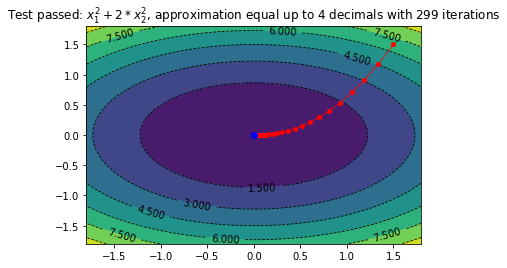

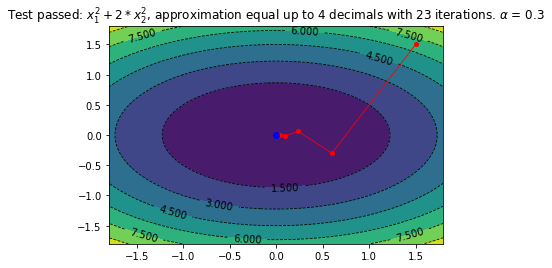

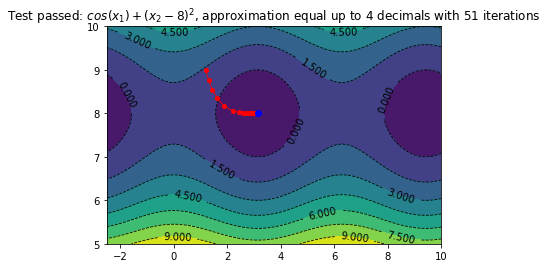

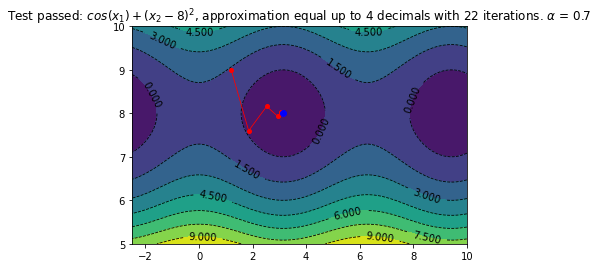

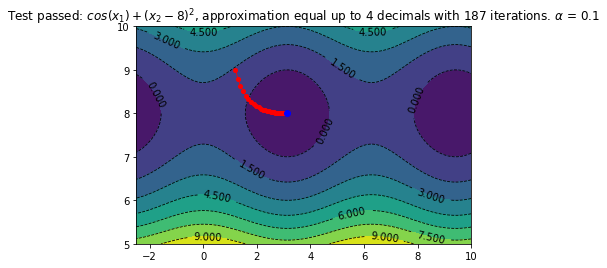

In [4]:
def test_grad_desc_method(f, x0, f_ex, function, pv, a):
  approx, iterations, test_list = gradient_descent_method(f, x0, a, test=True)
  err = [approx[0]-f_ex[0], approx[1]-f_ex[1]]
  x = np.linspace(pv[0][0], pv[0][1], 100)
  y = np.linspace(pv[1][0], pv[1][1], 100)
  z = np.meshgrid(x, y)
  fig, ax = plt.subplots()
  cp = ax.contour(z[0], z[1], f(z), colors='black', linestyles='dashed', linewidths=0.8)
  ax.contourf(z[0], z[1], f(z))
  ax.clabel(cp, inline=1, fontsize=10)
  x, y = np.transpose(np.array(test_list))
  ax.plot(x, y, '-o', color='r', linewidth=0.8, markersize=4)
  ax.plot(f_ex[0], f_ex[1], 'o', color='b')
  if a == None: 
    plt.title(r'Test passed: ${0}$, approximation equal up to 4 decimals with ${1}$ iterations'.format(function, iterations), fontsize='large')
  else: 
    plt.title(r'Test passed: ${0}$, approximation equal up to 4 decimals with ${1}$ iterations. $\alpha$ = ${2}$'.format(function, iterations, a), fontsize='large')
  plt.show()
  
  np.testing.assert_almost_equal(approx, f_ex, 4)

f1 = lambda x: x[0]**2 + 2*x[1]**2
f1_exact = np.array([0, 0])
init_guess1 = np.array([1.5, 1.5])
function1 = "x_1^2 + 2*x_2^2"
pv1 = [[-1.8, 1.8], [-1.8, 1.8]]

f2 = lambda x: np.cos(x[0]) + (x[1] - 8)**2
f2_exact = np.array([np.pi, 8])
init_guess2 = np.array([1.2, 9])
function2 = "cos(x_1) + (x_2 - 8)^2"
pv2 = [[-2.5, 10],[5, 10]]


test_grad_desc_method(f1, init_guess1, f1_exact, function1, pv1, None)
test_grad_desc_method(f1, init_guess1, f1_exact, function1, pv1, 0.3)

test_grad_desc_method(f2, init_guess2, f2_exact, function2, pv2, None)
test_grad_desc_method(f2, init_guess2, f2_exact, function2, pv2, 0.7)
test_grad_desc_method(f2, init_guess2, f2_exact, function2, pv2, 0.1)


# **Discussion**

We can clearly see that the approximation works well, and that the function is able to find solutions to the problem. However, I do believe that it was a bit tricky to implement the line_search method, since the description in the coursebook was quite vague, in my opinion. 

Since the **line_search** backtracking function might not be the most time efficient method I also tested the **gradient_descent_method** with a constant step size. As we can see in the results, if an appropriate step size is picked, we reduce the time complexity of the algorithm. 

For the first objective function, only 23 iterations where needed with $\alpha=0.3$ compared to 299 iterations of my implementation of line_search. For the second objective function the iterations where reduced to more than half. 

In the last plot we can see that if the constant step size is chosen "incorrectly" the iteration increases. 

Another thing that I did to reduce the number of iterations was, as mentioned, added an extra condition in **line_search**. When the new step size and the old differs less than 0.001, we return the $\alpha$ at that step. Before I added this constrained, the first test had max iterations (10000) which was not needed. 